# Plotting : Learning Errors

scipy.optimize.
curve_fit
curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)[source]



In [6]:
# Understanding p0

import numpy as np
from scipy.optimize import curve_fit

# Data
xdata = np.array([1, 2, 3])
ydata = np.array([1, 4, 9])



# Model function with ambiguous parameters
def fitting_function(x):
    return x ** 2  # No parameters to fit!



# This will raise ValueError!
params, covariance = curve_fit(fitting_function, xdata, ydata)
#params, _ = curve_fit(fitting_function, xdata, ydata)                        # If you don’t need covariance, use _ to discard it.
                                                                            # _ is a placeholder for unused return values.

# In Python, _ is a convention for ignoring a value. Here, it ignores the covariance matrix returned by curve_fit.

# params = best-fit values
# covariance = uncertainty matrix



# Why It Fails
    # No Parameters in Model: The fitting_function(x) takes only x and has no parameters to fit (like A, B, etc.).
    # curve_fit cannot determine how many parameters to optimize.




ValueError: Unable to determine number of fit parameters.

In [22]:
# Understanding p0


import numpy as np
from scipy.optimize import curve_fit

# Data
xdata = np.array([1, 2, 3, 1, 2, 3])
ydata = np.array([1, 4, 10, 1, 4.5, 3.8])

print("xdata =", xdata)  
print("ydata =", ydata)  


def correct_model(x, A, B):                                                             # Now has 2 parameters (A, B)
    return A * x ** 2 + B  

# Works fine
params, _ = curve_fit(correct_model, xdata, ydata, p0=[1, 0])                           # p0 optional
print("Parameters [A,B] =", params) 


def working_model(x, A, B):                                                             # Now has 2 parameters
    return A * x + B

params, _ = curve_fit(working_model, xdata, ydata, p0=[1, 0])                           # p0 is optional
print("Parameters [A,B] =", params)                                                    # Output: [A, B] (e.g., [2.0, -1.0])




xdata = [1 2 3 1 2 3]
ydata = [ 1.   4.  10.   1.   4.5  3.8]
Parameters [A,B] = [0.71632653 0.70714286]
Parameters [A,B] = [ 2.95 -1.85]


In [64]:
#   Understanding covariance matrix

import numpy as np
from scipy.optimize import curve_fit

# True parameters
A_true = 2.0
B_true = -0.5

# Generate noisy data
xdata = np.linspace(0, 5, 50)
ydata = A_true * np.exp(B_true * xdata) + 0.1 * np.random.normal(size=len(xdata))

print(xdata)
print(ydata)
print("\nOriginal parameters [A_true, B_true] =", "[", A_true,  B_true, "]")                                                   





def exponential_fit(x, A, B):
    return A * np.exp(B * x)

# Perform the fit
p0 = [1, -1]
params, pcov = curve_fit(exponential_fit, xdata, ydata, p0 = p0)
print(params)
A, B = params
A_err, B_err = np.sqrt(np.diag(pcov))                                                           # Standard errors of parameters : Standard deviation of parameters

print("\nFitted parameters [A,B] =", params)                                                    # Output: [A, B] (e.g., [2.0, -1.0])

print("\nCovariance matrix:")
print(pcov)

print("\nA_err, B_err:", A_err, B_err)

print("\nA_err^2, B_err^2:", A_err*A_err, B_err*B_err)

print("\n")
print(f"A ± A_err = {A:.5f} ± {A_err:.5f}")
print(f"B ± B_err = {B:.5f} ± {B_err:.5f}")

# Var(a) is the variance of parameters a=[a1, a2, .. aN]
# It is calculated from the diagonal of pcov.


[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[2.0043562  2.04545527 1.83163118 1.75085631 1.62074769 1.66794847
 1.58691036 1.52106913 1.32287894 1.2564079  1.02717453 1.13648555
 1.05735749 1.00490482 0.79834167 0.82011297 0.90590212 1.00085828
 0.72608795 0.7696855  0.78086085 0.52962461 0.85817079 0.67931309
 0.43564682 0.51809651 0.55059778 0.4443829  0.29149689 0.49033423
 0.23602027 0.34933009 0.43009885 0.54175458 0.1086644  0.12156874
 0.3909678  0.29277102 0.31772107 0.14

In [65]:
# Use of sigma

import numpy as np
from scipy.optimize import curve_fit


xdata = np.array([1, 2, 3])
ydata = np.array([1.1, 1.9, 3.2])
sigma = np.array([0.1, 0.2, 0.1])           # Standard deviations for each ydata point

# Model and data
def model(x, A, B):
    return A * x + B


popt, pcov = curve_fit(model, xdata, ydata, sigma=sigma)
print("Optimal params:", popt)

Optimal params: [1.05       0.02222222]



xdata :
 [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]

ydata :
 [ 2.1914234   1.3747252   1.20253942  1.0937708   0.90972445  0.61428408
  0.39868694  0.18439508 -0.1024604   0.2746691 ]

sigma :
 [0.05, 0.06, 0.08, 0.0001, 0.11, 0.13, 0.15, 0.16, 0.18, 1e-07]

Original parameters [A_true, B_true] = [ 2.0 -0.5 ]


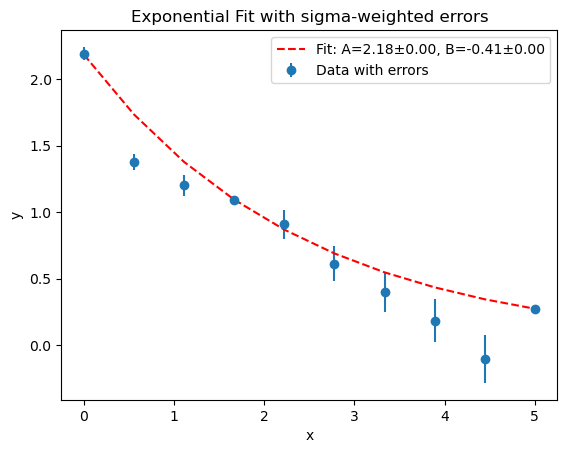

In [ ]:
# Use of sigma


import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# True parameters
A_true = 2.0
B_true = -0.5

# Synthetic data with noise
xdata = np.linspace(0, 5, 10)
ydata = A_true * np.exp(B_true * xdata) + 0.1 * np.random.normal(size=len(xdata))

# Assign uncertainties (sigma) to ydata
# sigma = 0.1 * np.ones_like(ydata)  # Uniform error for all points
#sigma = np.linspace(0.05, 0.2, len(ydata))                                  # Or: variable errors

sigma =  [0.05, 0.06, 0.08, 0.0001, 0.11, 0.13,  0.15, 0.16, 0.18, 0.0000001 ]
# Change sigma to see how fitting curve changes. You will see curves passes through the lowest sigma (means high precision value) values.

#How sigma Influences the Fit

    #If sigma is small for a point:
    #The fit prioritizes matching that point closely (high confidence).
    #Example: If sigma[0] = 0.01 (very precise), the fit will force the curve near (x0,y0)(x0​,y0​).

    #If sigma is large for a point:
    #The fit treats it as less important (low confidence).
    #Example: If sigma[-1] = 0.5 (noisy), the fit may deviate slightly at x_max​.

print("\nxdata :\n", xdata)
print("\nydata :\n", ydata)
print("\nsigma :\n", sigma)
print("\nOriginal parameters [A_true, B_true] =", "[", A_true,  B_true, "]")    


def model(x, A, B):
    return A * np.exp(B * x)

popt, pcov = curve_fit(model, xdata, ydata, sigma=sigma, absolute_sigma=True)
A_fit, B_fit = popt
A_err, B_err = np.sqrt(np.diag(pcov))                               # Standard errors


# Error bars show sigma. The fit avoids overfitting noisy points (large sigma).
plt.errorbar(xdata, ydata, yerr=sigma, fmt='o', label='Data with errors')


plt.plot(xdata, model(xdata, *popt), 'r--', label=f'Fit: A={A_fit:.2f}±{A_err:.2f}, B={B_fit:.2f}±{B_err:.2f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Fit with sigma-weighted errors')
plt.show()

